# Homework 1

In [83]:
import pandas as pd

## Load data

In [84]:
traning_data = pd.read_csv('testing_data.csv', delim_whitespace=False, header=None)
columns=['open','high','low','close']
traning_data.columns = columns       #setting columns
traning_data.head()

,open,high,low,close
0,324.360352,331.916199,324.077179,330.555054
1,330.366272,332.959412,328.175537,331.980774
2,328.925659,329.839722,325.994720,327.375732
3,327.445282,327.867523,322.795532,322.909790
4,321.161163,321.409546,308.607819,309.218842


## 大盤折線圖與20日均線圖

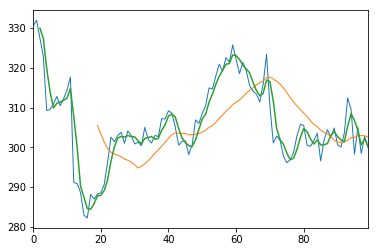

In [85]:
%matplotlib inline
close = traning_data['close']
period=20                            #Average daily line in 2 days
sma= close.rolling(period).mean()    #this is for decision
new_close= close.rolling(3).mean()   #get a smooth close trend ,it can reduce the numbers of  trades.
close.head(100).plot(linewidth=1)
sma.head(100).plot(linewidth=1)
new_close.head(100).plot()

## 由觀察可知當大盤高於日均線時大盤傾向於上漲；反之下跌，而大盤以三日均線new_close代表

>故我的策略為:
>if     close>均線  then buy 
>elif   close<均線  then sell

In [86]:
rising=new_close>=sma  #close > sma ,then market is tending to rising
falling=new_close<sma  #close < sma ,then market is tending to falling

In [87]:
trend=pd.Series([0]*len(rising),index=rising.index)
trend[rising]=1
trend[falling]=-1
trend=trend[trend!=0].reindex(trend.index).ffill() #Trend representing the trend of the market

>trend為大盤的傾向，1代表上漲、-1代表下跌、下圖為大盤傾向圖

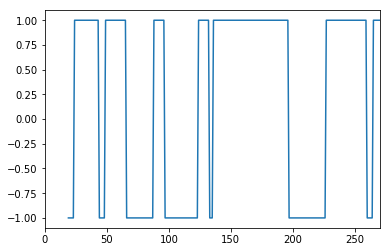

In [88]:
%matplotlib inline
trend.head(300).plot()

>接著以走向為依據
>進行股票的買、不動作、賣空，
>分別代表1、0、-1

In [89]:
act=pd.Series([0]*(len(trend)+1)) #act is the action we take next day.

temp=0
for i in range(period,len(trend)):  
    if (temp+trend[i-1]<=1)&(temp+trend[i-1]>=-1):
        if (trend[i-1]==-1):
            act[i]=-1
        else:
            act[i]=1
        temp+=trend[i-1]

>下圖為act的圖

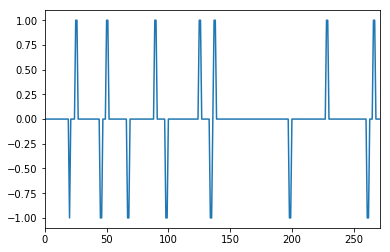

In [90]:
%matplotlib inline
act.head(300).plot()

>第一步不操作，故捨棄，因為宣告大小考量多宣告一個空間在此刪除
>最後將結果存回csv檔。

In [91]:
act.drop([0],inplace=True)
act.drop([len(trend)],inplace=True)
act.to_csv('output.csv', sep=',', encoding='utf-8',index=False)
act.tail(30)

241    0
242    0
243    0
244    0
245    0
246    0
247    0
248    0
249    0
250    0
251    0
252    0
253    0
254    0
255    0
256    0
257    0
258    0
259    0
260    0
261   -1
262   -1
263    0
264    0
265    0
266    1
267    1
268    0
269    0
270    0
dtype: int64